help manual

https://github.com/ccxt/ccxt/wiki/Manual

In [1]:
import ccxt
import datetime
import pandas as pd
import pandas_ta as ta
import time 
import json
### PARAMETERS

exchange='bybit'
symbol = 'BNB/USDT'
timeframe = '15m'  # 1 day : 1D timeframe
size=0.01



# Open the JSON file to read the key and secret


with open('./file.json') as f:
    data = json.load(f)

# Access the values from the loaded JSON data
key_value = data["key"]
secret_value = data["secret"]


# Initialize the exchange
exchange = eval(f'ccxt.{exchange}')({
    'enableRateLimit': True, 
    'options': {
        'adjustForTimeDifference': True,
        'recvWindow': 5000,
    },
    'apiKey': key_value,
    'secret': secret_value 
})




def fetch_price(symbol):
    price=exchange.fetchOrderBook(symbol)
    return price['bids'][0][0],price['asks'][0][0]

def check_orders(symbol):
    return exchange.fetchOpenOrders(symbol)


def logic_exec(symbol,size,timeframe,price,id):
    # Get the OHLCV (Open, High, Low, Close, Volume) data
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since=None, limit=300)

    # creating dataframe of ohlcv
    df=pd.DataFrame(ohlcv)

    ### PSAR
    d=ta.psar(df[2],df[3],df[4],0.06,0.06,0.6)

    # taking latest value only
    latest_val=d.iloc[-1]

    ### creating logic

    if latest_val['PSARl_0.06_0.6']>0:
        if id=='':
            price,_=fetch_price(symbol)
            # order = exchange.create_order (symbol, 'market', 'buy', size,price, params={})
            order = exchange.create_order (symbol, 'market', 'buy', size)

            id=order['info']['orderId']
            print('buy')
        print('long execution inlive')
        
            
    elif latest_val['PSARs_0.06_0.6']>0:
        if id!='':
            size=exchange.fetchBalance(params={'type': 'spot',})['BNB']['free']
            order = exchange.create_order (symbol, 'market', 'sell', size)
            id=''
            print('sell')
        print('short execution inlive')

    time.sleep(60)

    return logic_exec(symbol,size,timeframe,price,id)


logic_exec(symbol,size,timeframe,fetch_price(symbol)[0],id='')


# Print the fetched data


C:\Users\PyAlgo\AppData\Local\Temp\ipykernel_18284\2079978627.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


buy
long execution inlive
long execution inlive
long execution inlive
long execution inlive
long execution inlive
long execution inlive
long execution inlive
long execution inlive
long execution inlive
long execution inlive
long execution inlive
long execution inlive
long execution inlive


In [43]:
symbol = 'BNB/USDT'
type = 'limit'
side = 'sell'
amount = 0.01
price =200 
params = {
    'trailingPercent': 1.0, # percentage away from the current market price 1.0 is equal to 1%
    # 'trailingAmount': 100.0, # quote amount away from the current market price
    # 'trailingTriggerPrice': 44500.0, # the price to trigger activating a trailing stop order
    # 'reduceOnly': True, # set to True if you want to close a position, set to False if you want to open a new position
}
order = exchange.create_order (symbol, type, side, amount, price, params)

In [81]:
def fetch_price(symbol):
    price=exchange.fetchOrderBook(symbol)
    return price['bids'][0][0],price['asks'][0][0]
size=exchange.fetchBalance(params={'type': 'spot',})['BNB']['free']
order = exchange.create_order (symbol, 'market', 'sell',size)

NotSupported: bybit fetchLastPrices() is not supported yet

In [54]:
b=exchange.create_order (symbol, 'market', 'sell')

TypeError: bybit.create_order() missing 1 required positional argument: 'amount'

In [65]:
a=exchange.fetchMyTrades(symbol)

In [73]:
c=exchange.fetchBalance(params={
    'type': 'spot',
    
    
})

In [77]:
exchange.fetchBalance(params={'type': 'spot',})['BNB']['free']

0.00291708

In [29]:
order['info']['orderId']

'1621066106351656448'

In [30]:
exchange.cancelAllOrders('BNB/USDT')

[{'info': {'orderId': '1621066106351656448',
   'orderLinkId': '1621066106351656449'},
  'id': '1621066106351656448',
  'clientOrderId': '1621066106351656449',
  'timestamp': None,
  'datetime': None,
  'lastTradeTimestamp': None,
  'lastUpdateTimestamp': None,
  'symbol': 'BNB/USDT',
  'type': None,
  'timeInForce': None,
  'postOnly': None,
  'reduceOnly': None,
  'side': None,
  'price': None,
  'stopPrice': None,
  'triggerPrice': None,
  'takeProfitPrice': None,
  'stopLossPrice': None,
  'amount': None,
  'cost': None,
  'average': None,
  'filled': None,
  'remaining': None,
  'status': None,
  'fee': None,
  'trades': [],
  'fees': []}]

In [ ]:
createLimitBuyOrder (symbol, amount, price, param)
#// using general createOrder, type = 'limit' and side = 'buy' or 'sell'

exchange.createOrder (symbol, 'limit', side, amount, price, params)

In [18]:
import ccxt
import datetime
import pandas as pd
import pandas_ta as ta
import time 
import json
### PARAMETERS

exchange='bybit'
symbol = 'BTC/USDT'
timeframe = '15m'  # 1 day : 1D timeframe
size=0.001



# Open the JSON file to read the key and secret


with open('./file.json') as f:
    data = json.load(f)

# Access the values from the loaded JSON data
key_value = data["key"]
secret_value = data["secret"]


# Initialize the exchange
exchange = eval(f'ccxt.{exchange}')({
    'enableRateLimit': True, 
    'options': {
        'adjustForTimeDifference': True,
        'recvWindow': 5000,
    },
    'apiKey': key_value,
    'secret': secret_value 
})

<Axes: xlabel='0', ylabel='4'>

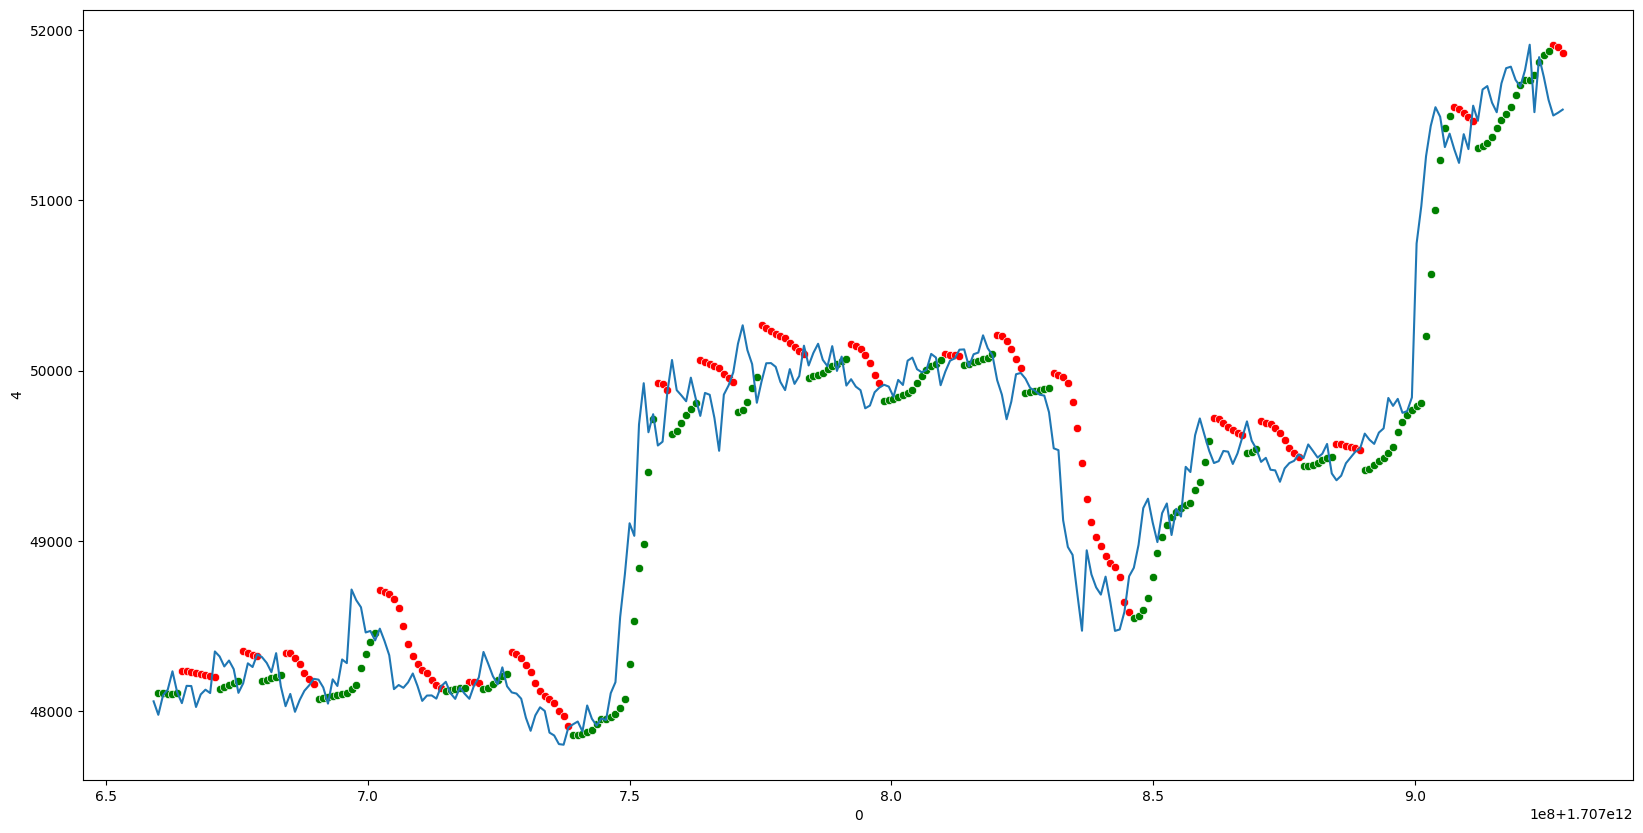

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))


sns.lineplot(x=df[0],y=df[4],data=df)
sns.scatterplot(x=df[0],y=d['PSARs_0.06_0.6'],data=df,color='red')
sns.scatterplot(x=df[0],y=d['PSARl_0.06_0.6'],data=df,color='green')
